In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from dython import nominal
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA





In [3]:
property_df = pd.read_csv('../data/curated/full_data.csv')

In [43]:
property_df.shape

(10864, 20)

In [4]:
property_df



,index,address,cost_text,Bed,Bath,Park,property_type,desc_head,LocID,longitude,latitude,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population,SA2_NAME21,duration_mins,Offence Count,SA2_CODE_2021
0,https://www.domain.com.au/warrandyte-vic-3113-...,Warrandyte VIC 3113,875.000000,5,3,3,House,mud brick magic,211021262,145.209992,-37.747366,930.0,481.0,3051.0,2779.0,8781.0,Warrandyte - Wonga Park,>50.0,859.0,211021262.0
1,https://www.domain.com.au/6-airlie-court-donca...,6 Airlie Court Doncaster East VIC 3109,850.000000,3,2,1,House,spaciou home east,207021424,145.150927,-37.777456,704.0,497.0,2158.0,1934.0,13507.0,Doncaster East - North,>50.0,859.0,207021424.0
2,https://www.domain.com.au/6-halcyon-court-donc...,6 HALCYON COURT Doncaster East VIC 3109,830.000000,4,2,2,House,spaciou four bedroom plu studi home view east,207021424,145.166327,-37.775254,704.0,497.0,2158.0,1934.0,13507.0,Doncaster East - North,>50.0,859.0,207021424.0
3,https://www.domain.com.au/7-davy-court-narre-w...,7 Davy Court Narre Warren South VIC 3805,795.000000,4,2,2,House,bedroom famili home prime locat warren south,212031457,145.318043,-38.061485,767.0,430.0,2350.0,2352.0,10833.0,Narre Warren South - East,>50.0,859.0,212031457.0
4,https://www.domain.com.au/level-1-301-13-15-la...,"Level 1, 301/13-15 Lake Street Caroline Spring...",793.269231,4,3,2,Apartment / Unit / Flat,endless possibl,213041463,144.744689,-37.731646,813.0,401.0,2277.0,2133.0,16696.0,Caroline Springs,>50.0,859.0,213041463.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,https://www.domain.com.au/8-298-nepean-highway...,8/298 Nepean Highway Seaford VIC 3198,365.000000,2,1,2,Apartment / Unit / Flat,easi care lifestyl,214011375,145.124349,-38.128700,809.0,351.0,2081.0,1500.0,15258.0,Seaford (Vic.),20.0,1018.0,214011375.0
10860,https://www.domain.com.au/8-90-nepean-highway-...,8/90 Nepean Highway Seaford VIC 3198,300.000000,2,1,1,Apartment / Unit / Flat,beach side locat,214011375,145.126181,-38.098008,809.0,351.0,2081.0,1500.0,15258.0,Seaford (Vic.),20.0,1018.0,214011375.0
10861,https://www.domain.com.au/86-centenary-street-...,86 Centenary Street Seaford VIC 3198,480.000000,4,2,3,House,solid bedroom home plenti space,214011375,145.158473,-38.110641,809.0,351.0,2081.0,1500.0,15258.0,Seaford (Vic.),40.0,1018.0,214011375.0
10862,https://www.domain.com.au/9-a-ti-tree-crescent...,9 A Ti Tree Crescent Seaford VIC 3198,285.000000,2,1,1,Apartment / Unit / Flat,privat rear courtyard bungalow plu garden bdrm...,214011375,145.156094,-38.111442,809.0,351.0,2081.0,1500.0,15258.0,Seaford (Vic.),40.0,1018.0,214011375.0


In [5]:
property_df.dtypes

index                           object
address                         object
cost_text                      float64
Bed                              int64
Bath                             int64
Park                             int64
property_type                   object
desc_head                       object
LocID                            int64
longitude                      float64
latitude                       float64
Median_tot_prsnl_inc_weekly    float64
Median_rent_weekly             float64
Median_tot_fam_inc_weekly      float64
Median_tot_hhd_inc_weekly      float64
total_population               float64
SA2_NAME21                      object
duration_mins                   object
Offence Count                  float64
SA2_CODE_2021                  float64
dtype: object

In [6]:
#COL_FILTER = ['cost_text', 'Bed', 'Bath', 'Park', 'longitude', 'latitude', 'Median_tot_prsnl_inc_weekly', 
              #'Median_rent_weekly', 'Median_tot_fam_inc_weekly', 'Median_tot_hhd_inc_weekly', 'total_population',
             #'Offence Count']

#df_numeric = property_df[COL_FILTER]

#sns.heatmap(df_numeric.corr())
#plt.title('Pearson Correlation Metric')
#plt.show()


In [7]:
categorical_features = identify_nominal_columns(property_df)
categorical_features


['index',
 'address',
 'property_type',
 'desc_head',
 'SA2_NAME21',
 'duration_mins']

In [8]:
#define columns of interest, removing those columns with unique values 

COL_FILTER = ['address', 'cost_text', 'Bed', 'Bath', 'Park', 'property_type', 'desc_head', 'longitude', 
              'latitude', 'Median_tot_prsnl_inc_weekly', 'Median_rent_weekly', 'Median_tot_fam_inc_weekly', 
              'Median_tot_hhd_inc_weekly', 'total_population', 'SA2_NAME21', 'duration_mins', 'Offence Count'] 

df_filtered = property_df[COL_FILTER]


/usr/local/lib/python3.10/dist-packages/dython/nominal.py:160: RuntimeWarning: Rounded V = 1.0000000000000056 to 1.0. This is probably due to floating point precision issues.
  warnings.warn(


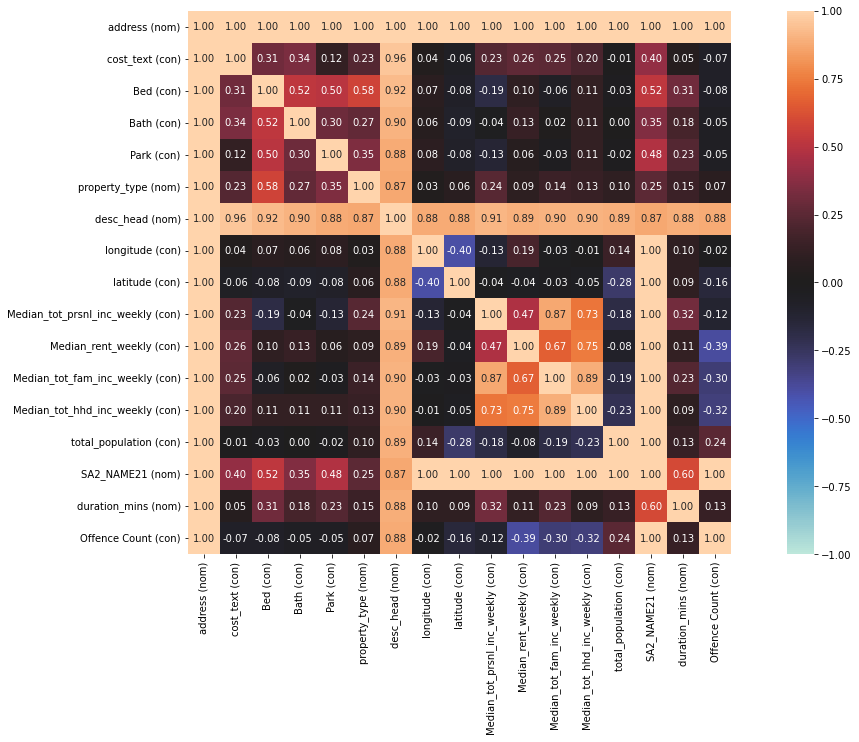

{'corr':                                    address (nom)  cost_text (con)  Bed (con)  \
 address (nom)                           1.000000         1.000000   0.999977   
 cost_text (con)                         1.000000         1.000000   0.307571   
 Bed (con)                               0.999977         0.307571   1.000000   
 Bath (con)                              0.999933         0.340436   0.518891   
 Park (con)                              0.999974         0.115870   0.503053   
 property_type (nom)                     1.000000         0.233268   0.576091   
 desc_head (nom)                         1.000000         0.956491   0.924704   
 longitude (con)                         1.000000         0.035798   0.073229   
 latitude (con)                          1.000000        -0.060733  -0.077952   
 Median_tot_prsnl_inc_weekly (con)       1.000000         0.231663  -0.186371   
 Median_rent_weekly (con)                1.000000         0.263026   0.095886   
 Median_tot_fam_inc_

In [9]:
#generate correlation matrix with both categorical and continuous variables 
#using Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, 
#Cramer’s V or Theil’s U for categorical-categorical cases.
#code sourced from: https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26

#first define the associations function

nominal.associations(df_filtered,figsize=(20,10), mark_columns=True, cramers_v_bias_correction=False)

#nominal.associations(property_df, nominal_columns='auto', numerical_columns=None, mark_columns=True,
                     #nom_nom_assoc='cramer', num_num_assoc='pearson', nom_num_assoc='correlation_ratio', 
                     #symmetric_nom_nom=True, symmetric_num_num=True, display_rows='all', display_columns='all', 
                     #hide_rows=None, hide_columns=None, cramers_v_bias_correction=True, ax=None, figsize=(20,10), 
                     #annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
                     #compute_only=False, clustering=False, title=None, filename=None, 
                     #multiprocessing=False, max_cpu_cores=None)



In [ ]:
#we see desc_head is highly correlated with other variables so shold we remove that from the dataframe?

#we can observe that median_tot_prsnl_inc_weekly is highly correlated with median_tot_fam_inc_weekly and median_tot_hhd_inc_weekly
#median_tot_fam_inc_weekly and median_tot_hhd_inc_weekly are highly correlated 
#median_rent weekly and median_tot_hhd_inc_weekly are hihgly correlated 

**Observe some of these correlations with scatterplots**

Text(0.5, 1.0, 'Median Total Personal Income vs Median Total Family Income')

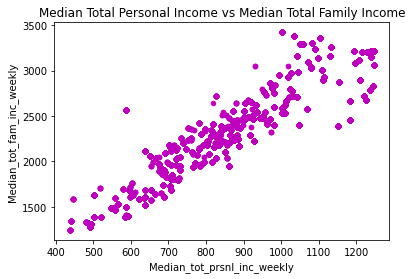

In [13]:
df_filtered[['Median_tot_prsnl_inc_weekly', 'Median_tot_fam_inc_weekly']].plot.scatter(x='Median_tot_prsnl_inc_weekly', y='Median_tot_fam_inc_weekly', c="m")
plt.title("Median Total Personal Income vs Median Total Family Income") 


Text(0.5, 1.0, 'Median Rent Weekly vs Median Total Household Income')

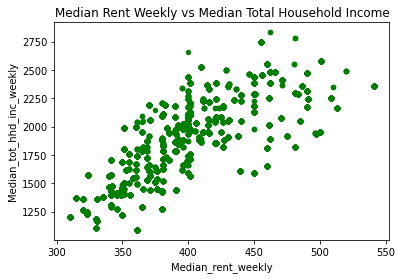

In [14]:
df_filtered[['Median_rent_weekly', 'Median_tot_hhd_inc_weekly']].plot.scatter(x='Median_rent_weekly', y='Median_tot_hhd_inc_weekly', c="g")
plt.title("Median Rent Weekly vs Median Total Household Income")

In [17]:
#do principal component analysis
#then fill out slides
#Literature review 

In [19]:
property_df.dtypes

index                           object
address                         object
cost_text                      float64
Bed                              int64
Bath                             int64
Park                             int64
property_type                   object
desc_head                       object
LocID                            int64
longitude                      float64
latitude                       float64
Median_tot_prsnl_inc_weekly    float64
Median_rent_weekly             float64
Median_tot_fam_inc_weekly      float64
Median_tot_hhd_inc_weekly      float64
total_population               float64
SA2_NAME21                      object
duration_mins                   object
Offence Count                  float64
SA2_CODE_2021                  float64
dtype: object

In [29]:
#Based on https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

features = ['Bed', 'Bath', 'Park', 'longitude', 
            'latitude', 'Median_tot_prsnl_inc_weekly', 'Median_rent_weekly', 'Median_tot_fam_inc_weekly', 
              'Median_tot_hhd_inc_weekly', 'total_population', 'Offence Count']

# Separating out the features
x = property_df.loc[:, features].values

# Separating out the target
y = property_df.loc[:,['cost_text']].values

# Standardizing the features
x_standardised = StandardScaler().fit_transform(x)

**Projecting these features into a 2d representation of the data**

This is in order to visualise the two main dimensions of variation


In [61]:
#we want to reduce the data to two components, keeping the top two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_standardised)

principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])

In [62]:
principal_df

,principal component 1,principal component 2
0,-3.251333,4.043425
1,-0.491373,1.317637
2,-0.532060,2.440605
3,-0.867087,3.238996
4,-0.156607,2.038664
...,...,...
10859,1.714150,0.778708
10860,1.735434,0.181194
10861,1.560575,3.308584
10862,1.736905,0.277028


In [63]:
final_reduced_df = pd.concat([principal_df, property_df[['cost_text']]], axis = 1)


In [64]:
final_reduced_df

,principal component 1,principal component 2,cost_text
0,-3.251333,4.043425,875.000000
1,-0.491373,1.317637,850.000000
2,-0.532060,2.440605,830.000000
3,-0.867087,3.238996,795.000000
4,-0.156607,2.038664,793.269231
...,...,...,...
10859,1.714150,0.778708,365.000000
10860,1.735434,0.181194,300.000000
10861,1.560575,3.308584,480.000000
10862,1.736905,0.277028,285.000000


**Visualise the 2D Projection**

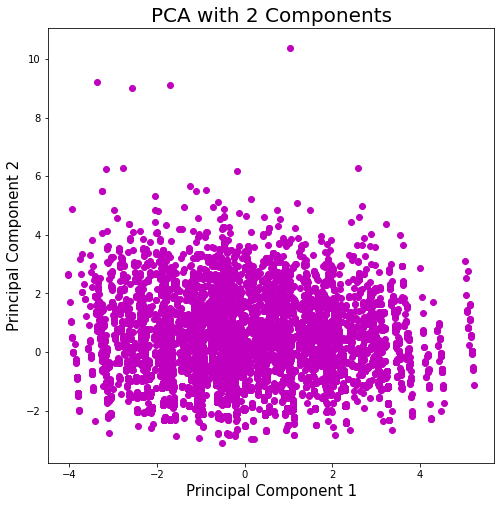

In [91]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with 2 Components', fontsize = 20)

ax.scatter(final_reduced_df['principal component 1']
               ,final_reduced_df['principal component 2'], c='m')

In [66]:
print("Variance explained by Principal Component 1: ", (pca.explained_variance_ratio_ * 100)[0]) 
print("Variance explained by Principal Component 2: ", (pca.explained_variance_ratio_ * 100)[1]) 

print("Variance explained by the two Principal Components: ", np.cumsum(pca.explained_variance_ratio_ * 100)[1]) 




Variance explained by Principal Component 1:  30.99860773409392
Variance explained by Principal Component 2:  18.566218110689295
Variance explained by the two Principal Components:  49.564825844783215


**The Number of Components Needed to Explain Variance** (code from https://www.dataknowsall.com/pcavisualized.html)

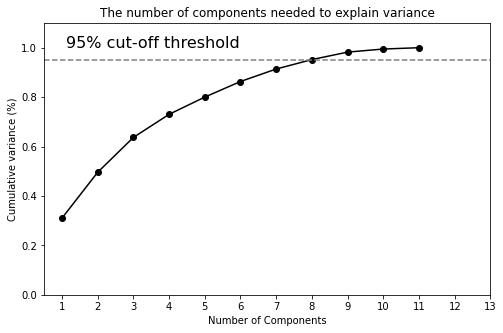

In [83]:
fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)

plt.show()


After plotting cumulative explained variance, we note that the curve begins to flatten around 6-7 components. We draw our line at 95% of the explained variance, and so we see that the total explained variance is at around  see how the curve flattens slightly around 8 components.